<a href="https://colab.research.google.com/github/cheetah-aa/Machine-learning-project/blob/main/lung_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

Read Data

In [3]:
df = pd.read_csv('survey lung cancer.csv')
df.head(10)

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO
5,F,75,1,2,1,1,2,2,2,2,1,2,2,1,1,YES
6,M,52,2,1,1,1,1,2,1,2,2,2,2,1,2,YES
7,F,51,2,2,2,2,1,2,2,1,1,1,2,2,1,YES
8,F,68,2,1,2,1,1,2,1,1,1,1,1,1,1,NO
9,M,53,2,2,2,2,2,1,2,1,2,1,1,2,2,YES


Clean Data

In [4]:
df.duplicated().sum()

np.int64(33)

In [5]:
df.drop_duplicates(inplace=True)

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isna().sum()

,0
GENDER,0
AGE,0
SMOKING,0
YELLOW_FINGERS,0
ANXIETY,0
PEER_PRESSURE,0
CHRONIC DISEASE,0
FATIGUE,0
ALLERGY,0
WHEEZING,0


Explore Data

In [8]:
df['AGE'].describe()

,AGE
count,276.000000
mean,62.909420
std,8.379355
min,21.000000
25%,57.750000
50%,62.500000
75%,69.000000
max,87.000000


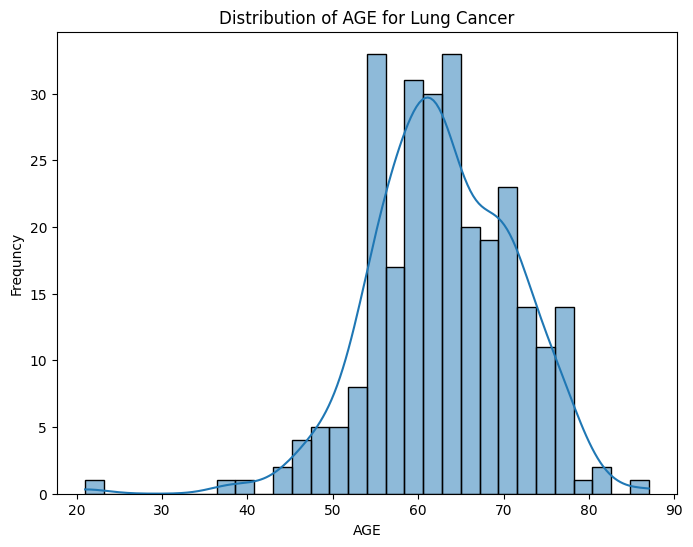

In [9]:
plt.figure(figsize=(8,6))
sns.histplot(df['AGE'],bins=30,kde=True)
plt.title('Distribution of AGE for Lung Cancer')
plt.xlabel('AGE')
plt.ylabel('Frequncy')
plt.show()

In [10]:
count_Gender= df['GENDER'].value_counts()
count_Gender

,count
GENDER,
M,142
F,134


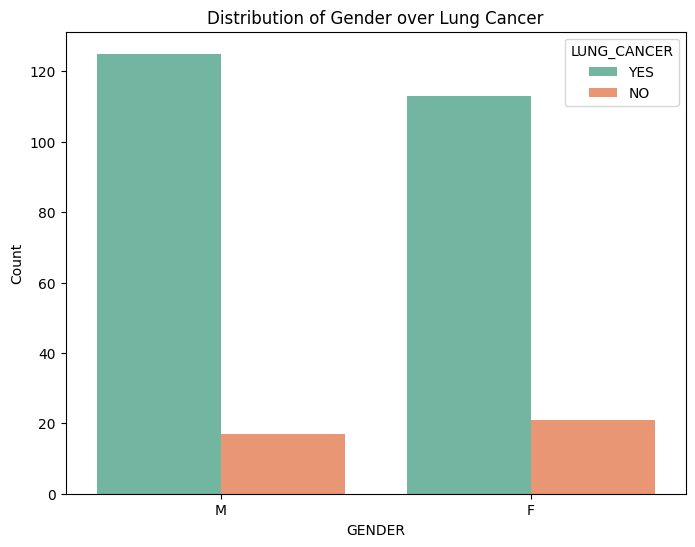

In [11]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'GENDER',hue='LUNG_CANCER',data = df,palette="Set2")
plt.title('Distribution of Gender over Lung Cancer')
plt.xlabel('GENDER')
plt.ylabel('Count')
plt.show()

In [12]:
df2 = df.replace({2:"YES",1:'NO'})

In [13]:
df.columns = df.columns.str.strip()

In [14]:
df2.columns = df2.columns.str.strip()

In [15]:
df2.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,NO,YES,YES,NO,NO,YES,NO,YES,YES,YES,YES,YES,YES,YES
1,M,74,YES,NO,NO,NO,YES,YES,YES,NO,NO,NO,YES,YES,YES,YES
2,F,59,NO,NO,NO,YES,NO,YES,NO,YES,NO,YES,YES,NO,YES,NO
3,M,63,YES,YES,YES,NO,NO,NO,NO,NO,YES,NO,NO,YES,YES,NO
4,F,63,NO,YES,NO,NO,NO,NO,NO,YES,NO,YES,YES,NO,NO,NO


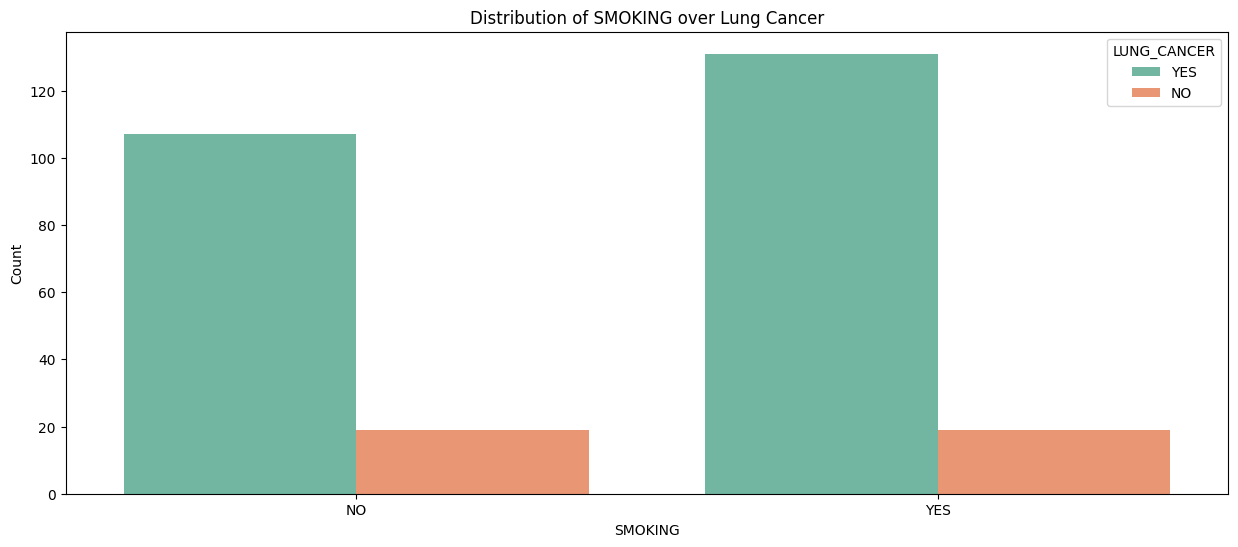

In [16]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'SMOKING',hue='LUNG_CANCER',data = df2,palette="Set2")
plt.title('Distribution of SMOKING over Lung Cancer')
plt.xlabel('SMOKING')
plt.ylabel('Count')
plt.show()

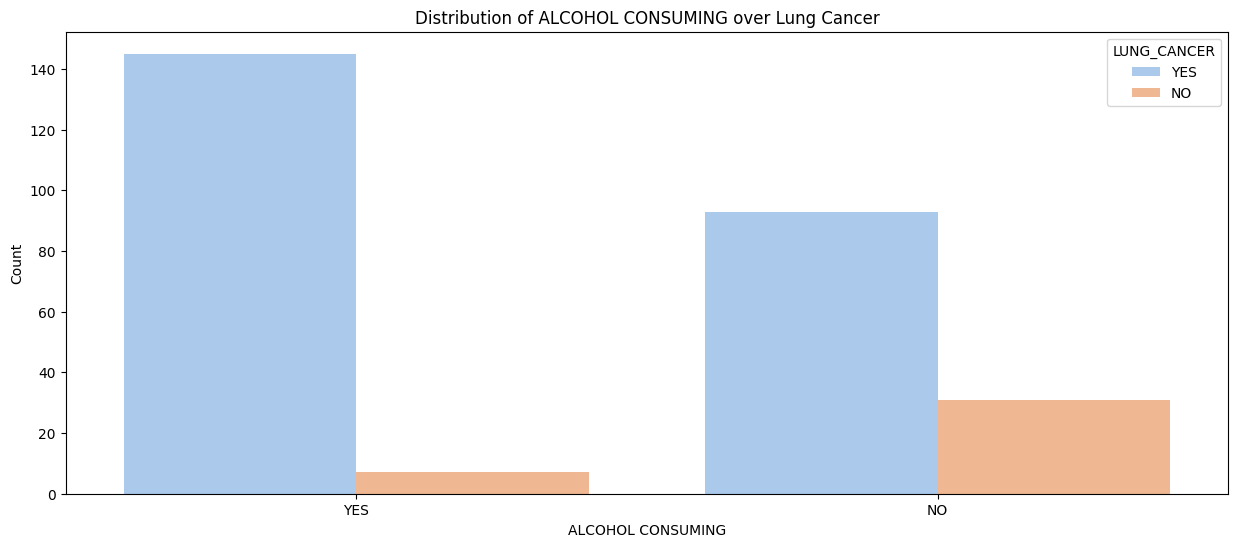

In [17]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'ALCOHOL CONSUMING',hue='LUNG_CANCER',data = df2,palette="pastel")
plt.title('Distribution of ALCOHOL CONSUMING over Lung Cancer')
plt.xlabel('ALCOHOL CONSUMING')
plt.ylabel('Count')
plt.show()

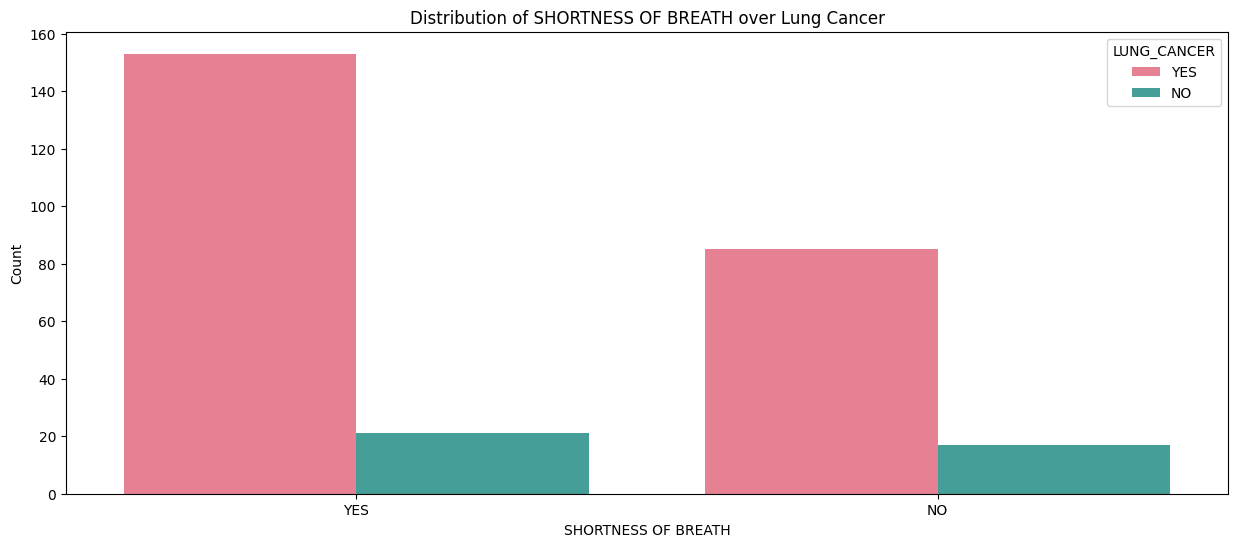

In [18]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'SHORTNESS OF BREATH',hue='LUNG_CANCER',data = df2,palette="husl")
plt.title('Distribution of SHORTNESS OF BREATH over Lung Cancer')
plt.xlabel('SHORTNESS OF BREATH')
plt.ylabel('Count')
plt.show()

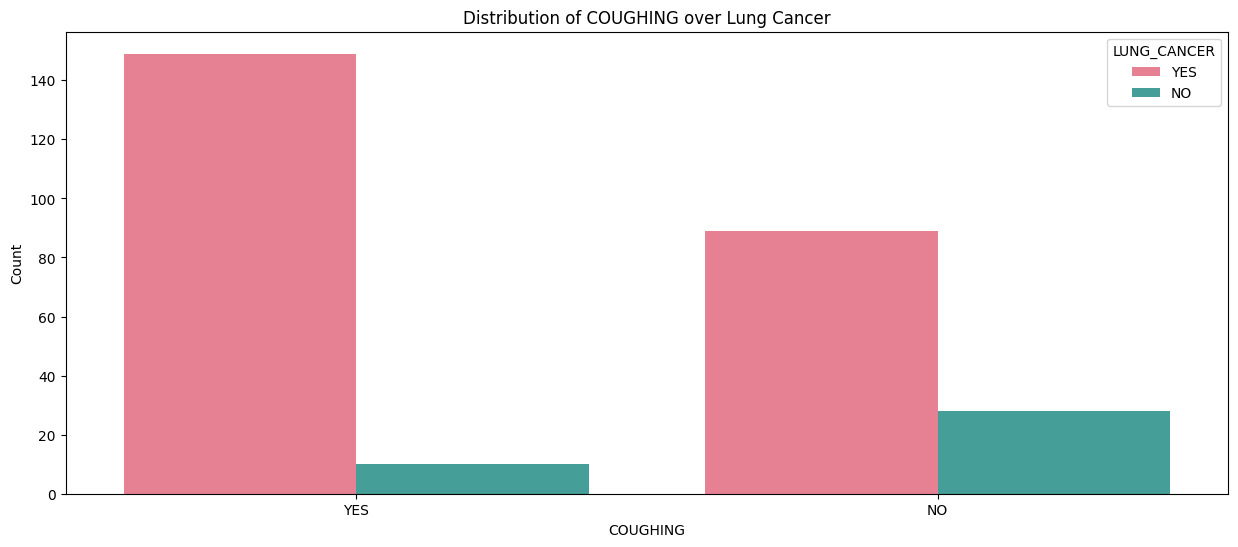

In [19]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'COUGHING',hue='LUNG_CANCER',data = df2,palette="husl")
plt.title('Distribution of COUGHING over Lung Cancer')
plt.xlabel('COUGHING')
plt.ylabel('Count')
plt.show()

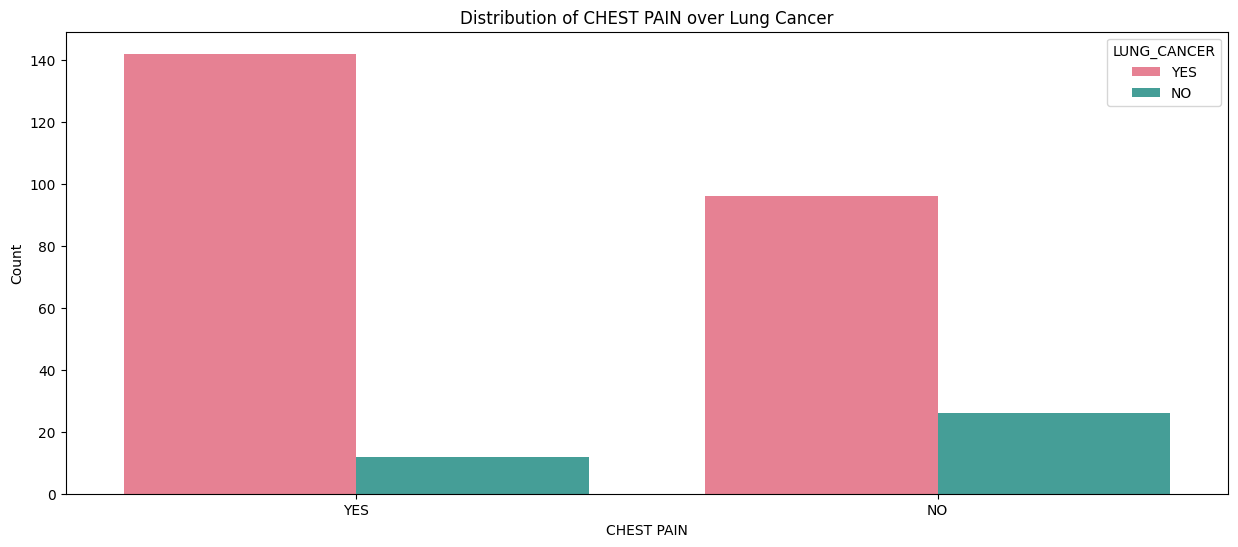

In [20]:
plt.figure(figsize=(15,6))
sns.countplot(x = 'CHEST PAIN',hue='LUNG_CANCER',data = df2,palette="husl")
plt.title('Distribution of CHEST PAIN over Lung Cancer')
plt.xlabel('CHEST PAIN')
plt.ylabel('Count')
plt.show()

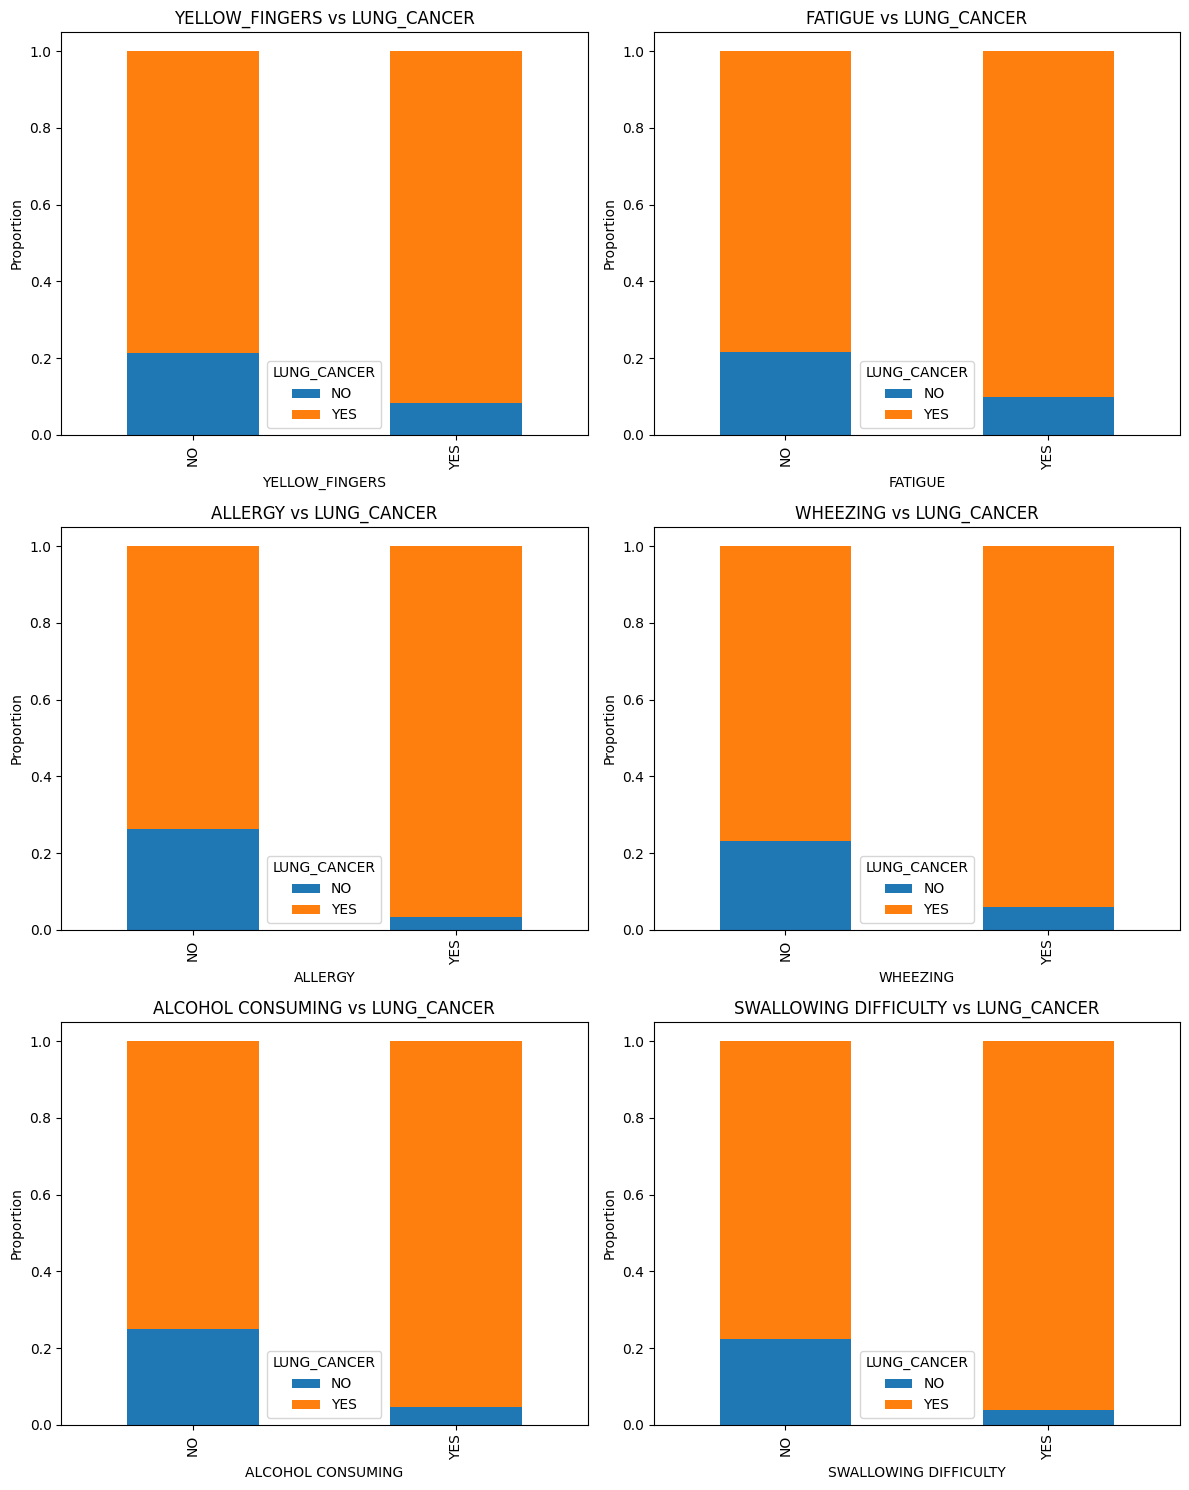

In [21]:
def stacked_bar(data, feature, target, ax):
    crosstab = pd.crosstab(data[feature], data[target], normalize='index')
    crosstab.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'{feature} vs {target}')
    ax.set_ylabel('Proportion')

# Set up the figure
fig, axes = plt.subplots(3, 2, figsize=(12, 15))

# Plot each feature
stacked_bar(df2, 'YELLOW_FINGERS', 'LUNG_CANCER', axes[0, 0])
stacked_bar(df2, 'FATIGUE', 'LUNG_CANCER', axes[0, 1])
stacked_bar(df2, 'ALLERGY', 'LUNG_CANCER', axes[1, 0])
stacked_bar(df2, 'WHEEZING', 'LUNG_CANCER', axes[1, 1])
stacked_bar(df2, 'ALCOHOL CONSUMING', 'LUNG_CANCER', axes[2, 0])
stacked_bar(df2, 'SWALLOWING DIFFICULTY', 'LUNG_CANCER', axes[2, 1])

# Adjust layout
plt.tight_layout()
plt.show()

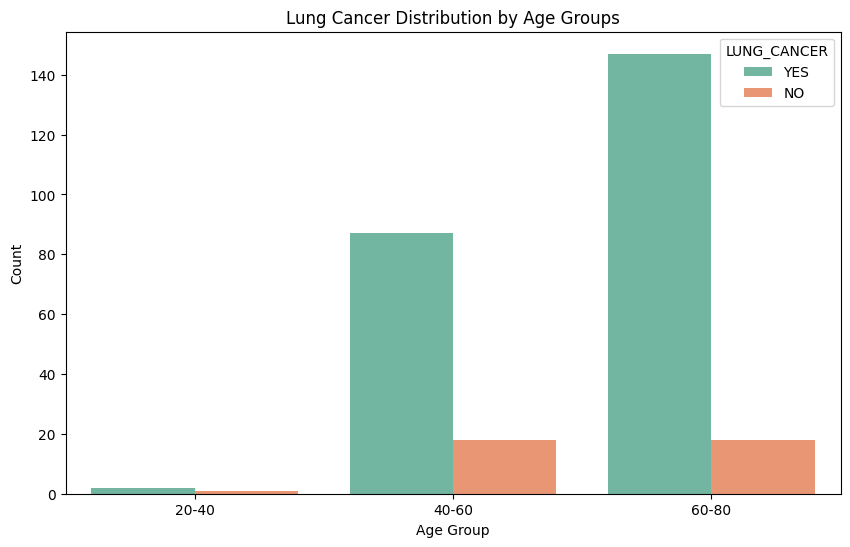

In [22]:
df2['AGE_BIN'] = pd.cut(df2['AGE'], bins=[20, 40, 60, 80], labels=['20-40', '40-60', '60-80'])
plt.figure(figsize=(10,6))
sns.countplot(x='AGE_BIN', hue='LUNG_CANCER', data=df2, palette="Set2")
plt.title('Lung Cancer Distribution by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

In [23]:
df['GENDER'] = df['GENDER'].replace({'M':1,'F':2})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES':1,"NO":2})

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   GENDER                 276 non-null    int64
 1   AGE                    276 non-null    int64
 2   SMOKING                276 non-null    int64
 3   YELLOW_FINGERS         276 non-null    int64
 4   ANXIETY                276 non-null    int64
 5   PEER_PRESSURE          276 non-null    int64
 6   CHRONIC DISEASE        276 non-null    int64
 7   FATIGUE                276 non-null    int64
 8   ALLERGY                276 non-null    int64
 9   WHEEZING               276 non-null    int64
 10  ALCOHOL CONSUMING      276 non-null    int64
 11  COUGHING               276 non-null    int64
 12  SHORTNESS OF BREATH    276 non-null    int64
 13  SWALLOWING DIFFICULTY  276 non-null    int64
 14  CHEST PAIN             276 non-null    int64
 15  LUNG_CANCER            276 non-null    int64


In [25]:
count_patient = df["LUNG_CANCER"].value_counts()
count_patient

,count
LUNG_CANCER,
1,238
2,38


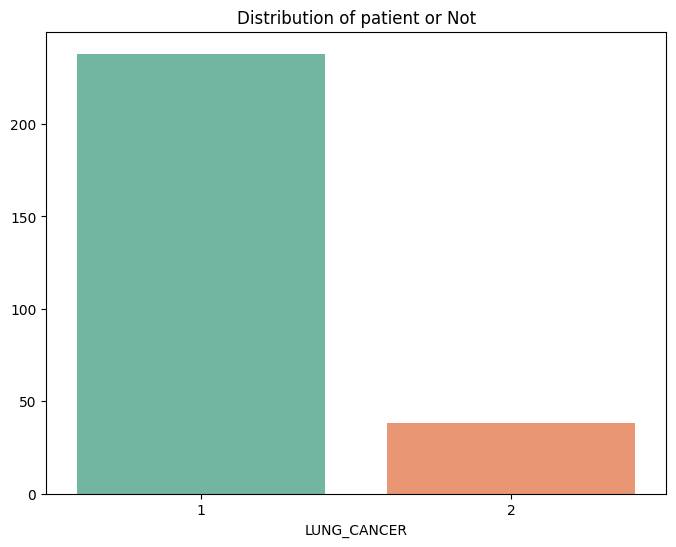

In [26]:
plt.figure(figsize=(8,6))
sns.barplot(x=count_patient.index,y=count_patient.values,palette='Set2')
plt.title('Distribution of patient or Not')
plt.show()

In [27]:
df.corr()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
GENDER,1.000000,0.013120,-0.041131,0.202506,0.152032,0.261427,0.189925,0.079020,-0.150174,-0.121047,-0.434264,-0.120228,0.052893,0.048959,-0.361547,0.053666
AGE,0.013120,1.000000,-0.073410,0.025773,0.050605,0.037848,-0.003431,0.021606,0.037139,0.052803,0.052049,0.168654,-0.009189,0.003199,-0.035806,-0.106305
SMOKING,-0.041131,-0.073410,1.000000,-0.020799,0.153389,-0.030364,-0.149415,-0.037803,-0.030179,-0.147081,-0.052771,-0.138553,0.051761,0.042152,0.106984,-0.034878
YELLOW_FINGERS,0.202506,0.025773,-0.020799,1.000000,0.558344,0.313067,0.015316,-0.099644,-0.147130,-0.058756,-0.273643,0.020803,-0.109959,0.333349,-0.099169,-0.189192
ANXIETY,0.152032,0.050605,0.153389,0.558344,1.000000,0.210278,-0.006938,-0.181474,-0.159451,-0.174009,-0.152228,-0.218843,-0.155678,0.478820,-0.123182,-0.144322
PEER_PRESSURE,0.261427,0.037848,-0.030364,0.313067,0.210278,1.000000,0.042893,0.094661,-0.066887,-0.037769,-0.132603,-0.068224,-0.214115,0.327764,-0.074655,-0.195086
CHRONIC DISEASE,0.189925,-0.003431,-0.149415,0.015316,-0.006938,0.042893,1.000000,-0.099411,0.134309,-0.040546,0.010144,-0.160813,-0.011760,0.068263,-0.048895,-0.143692
FATIGUE,0.079020,0.021606,-0.037803,-0.099644,-0.181474,0.094661,-0.099411,1.000000,-0.001841,0.152151,-0.181573,0.148538,0.407027,-0.115727,0.013757,-0.160078
ALLERGY,-0.150174,0.037139,-0.030179,-0.147130,-0.159451,-0.066887,0.134309,-0.001841,1.000000,0.166517,0.378125,0.206367,-0.018030,-0.037581,0.245440,-0.333552
WHEEZING,-0.121047,0.052803,-0.147081,-0.058756,-0.174009,-0.037769,-0.040546,0.152151,0.166517,1.000000,0.261061,0.353657,0.042289,0.108304,0.142846,-0.249054


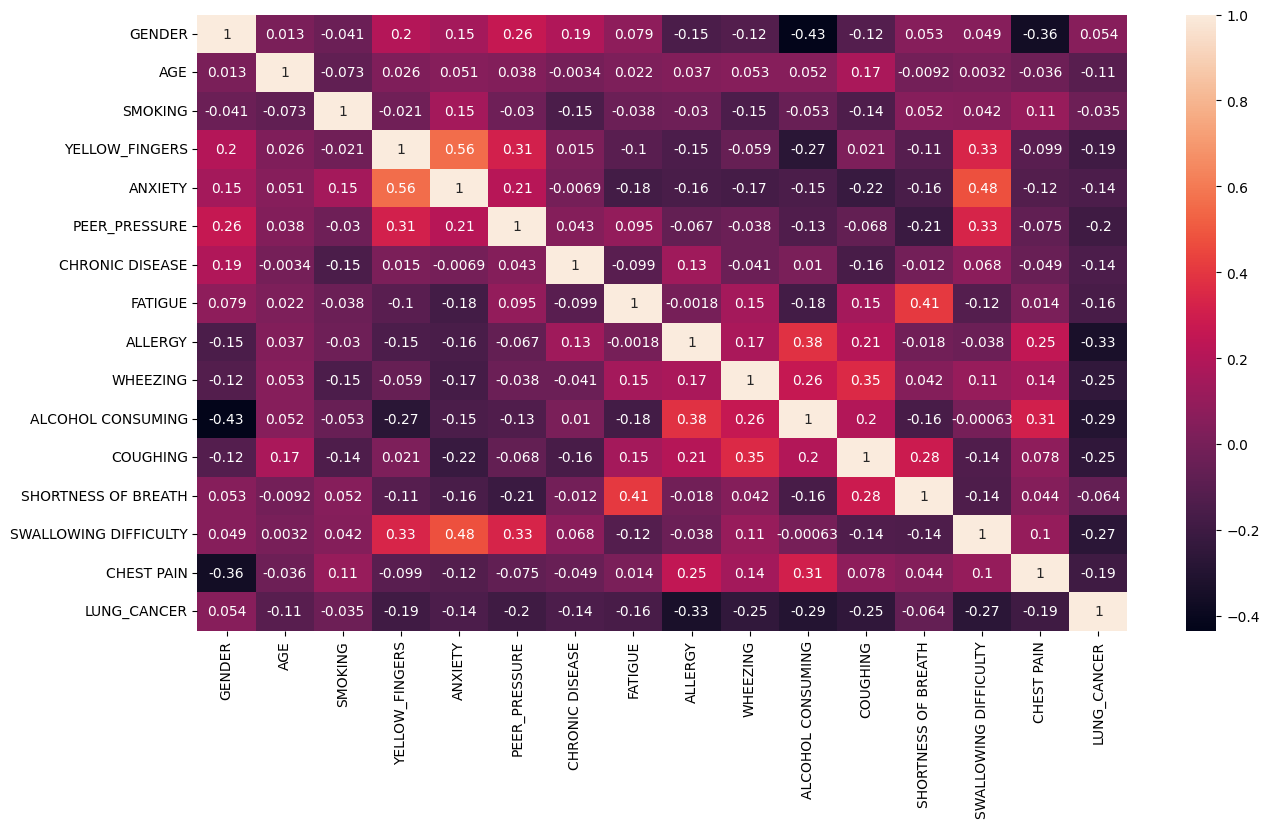

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [58]:
# Calculate IQR for AGE
Q1 = df['AGE'].quantile(0.25)
Q3 = df['AGE'].quantile(0.75)
IQR = Q3 - Q1

# Filter out the outliers
df_clean = df[(df['AGE'] >= Q1 - 1.5 * IQR) & (df['AGE'] <= Q3 + 1.5 * IQR)]

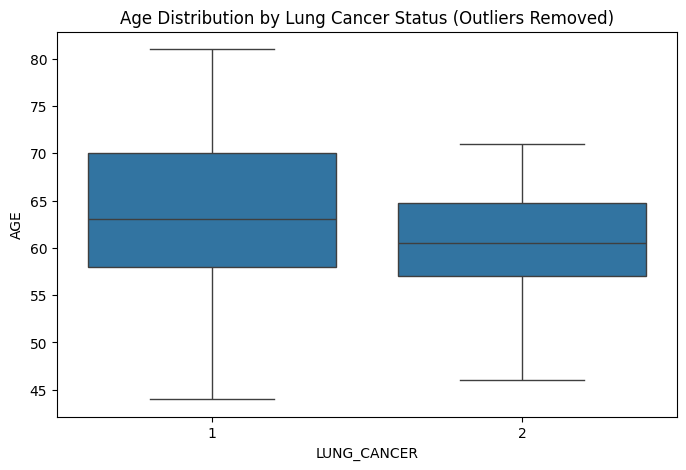

In [59]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='LUNG_CANCER', y='AGE', data=df_clean)
plt.title('Age Distribution by Lung Cancer Status (Outliers Removed)')
plt.show()

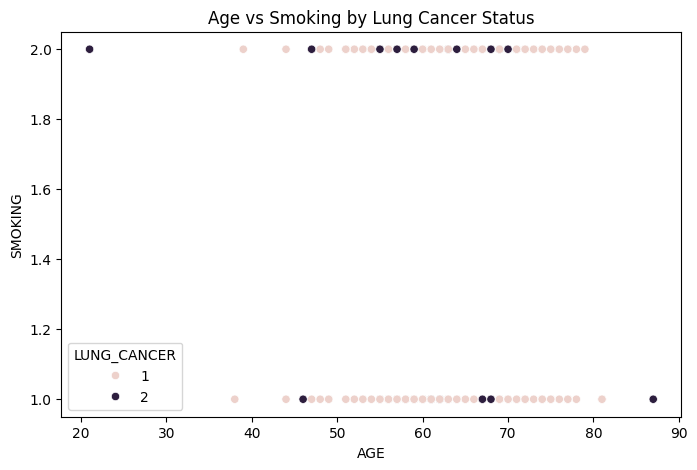

In [55]:
# Scatter plot: Age vs Smoking, colored by Lung Cancer status
plt.figure(figsize=(8, 5))
sns.scatterplot(x='AGE', y='SMOKING', hue='LUNG_CANCER', data=df)
plt.title('Age vs Smoking by Lung Cancer Status')
plt.show()

Build Models

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, ConfusionMatrixDisplay

In [30]:
X = df.drop(columns=['LUNG_CANCER'])
y = df['LUNG_CANCER']

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
xscale = scale.fit_transform(X)

In [32]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)

In [33]:
X_resampled, y_resampled = ros.fit_resample(xscale, y)

In [34]:
df_resampled = pd.concat([pd.DataFrame(X_resampled, columns=X.columns), pd.DataFrame(y_resampled, columns=['LUNG_CANCER'])], axis=1)


print(df_resampled['LUNG_CANCER'].value_counts())

LUNG_CANCER
1    238
2    238
Name: count, dtype: int64


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [37]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')

    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Cancer', 'Has Cancer'])
    disp.plot(cmap='Purples')
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()

    return accuracy

Logistic Regression

In [38]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

Logistic Regression Accuracy: 0.90
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           1       0.89      0.89      0.89        44
           2       0.90      0.90      0.90        52

    accuracy                           0.90        96
   macro avg       0.90      0.90      0.90        96
weighted avg       0.90      0.90      0.90        96



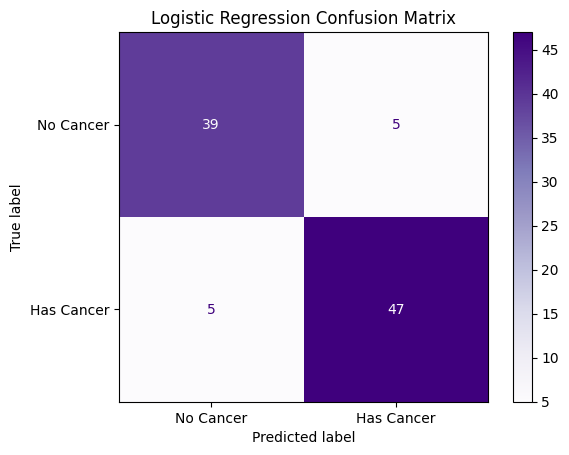

0.8958333333333334

In [39]:
log_reg_accuracy =evaluate_model(log_reg, X_test, y_test, 'Logistic Regression')
log_reg_accuracy

SVM

In [40]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

Support Vector Classifier Accuracy: 0.94
Support Vector Classifier Classification Report:
              precision    recall  f1-score   support

           1       0.97      0.89      0.93        44
           2       0.91      0.98      0.94        52

    accuracy                           0.94        96
   macro avg       0.94      0.93      0.94        96
weighted avg       0.94      0.94      0.94        96



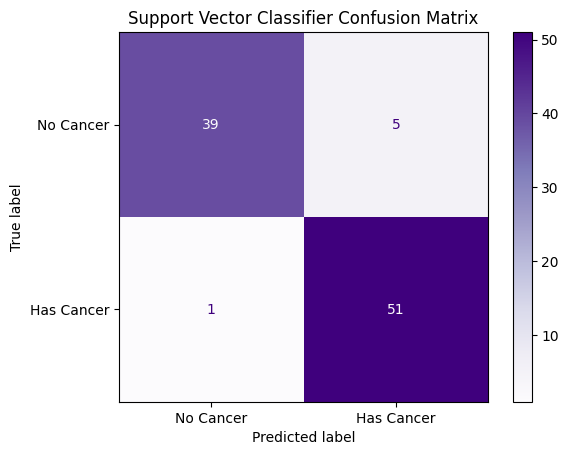

0.9375

In [41]:
svc_accuracy =evaluate_model(svc, X_test, y_test, 'Support Vector Classifier')
svc_accuracy

Random Forest

In [42]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

Random Forest Classifier Accuracy: 0.97
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           1       1.00      0.93      0.96        44
           2       0.95      1.00      0.97        52

    accuracy                           0.97        96
   macro avg       0.97      0.97      0.97        96
weighted avg       0.97      0.97      0.97        96



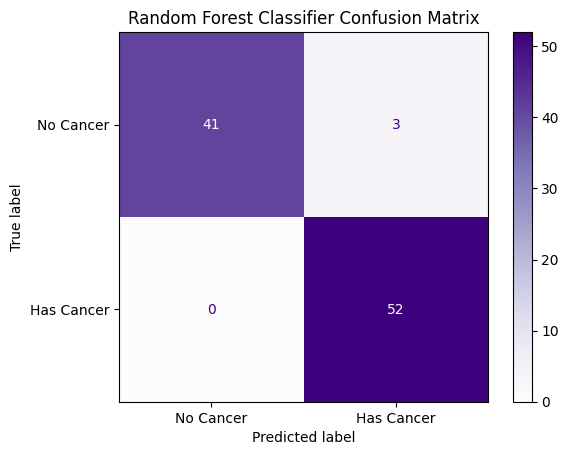

0.96875

In [43]:
rf_accuracy= evaluate_model(rf, X_test, y_test, 'Random Forest Classifier')
rf_accuracy

XGBoost

In [44]:
y_train_binary = y_train.replace({1: 0, 2: 1})  # Map 1 -> 0 (no cancer) and 2 -> 1 (has cancer)
y_test_binary = y_test.replace({1: 0, 2: 1})      # Same mapping for the test set

In [45]:
import xgboost as xgb
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

xgboost_model.fit(X_train, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

XGBoost Classifier Accuracy: 0.98
XGBoost Classifier Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.95      0.98        44
           1       0.96      1.00      0.98        52

    accuracy                           0.98        96
   macro avg       0.98      0.98      0.98        96
weighted avg       0.98      0.98      0.98        96



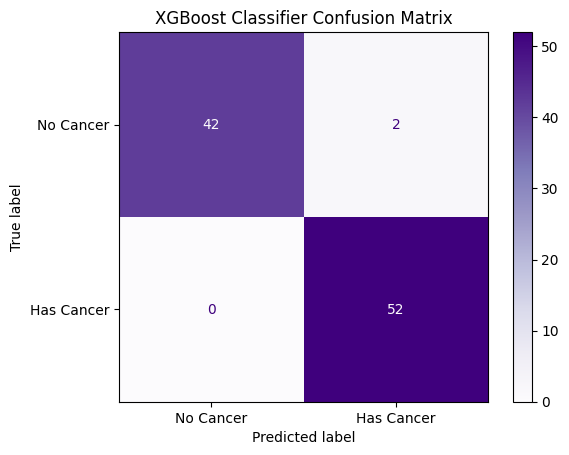

XGBoost Classifier Accuracy: 0.9791666666666666


In [46]:
xgboost_accuracy = evaluate_model(xgboost_model, X_test, y_test_binary, 'XGBoost Classifier')
print(f'XGBoost Classifier Accuracy: {xgboost_accuracy}')

Fine Tuning for XGBoost

In [47]:
xgboost_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.8, 1.0],
}

In [48]:
from sklearn.model_selection import GridSearchCV



grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, scoring='accuracy', cv=3)
grid_search.fit(X_train, y_train_binary)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 1.0]},
             scoring='accuracy')

In [49]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validated Accuracy:", best_score)

Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.8}
Best Cross-Validated Accuracy: 0.9447777361163188


In [50]:
best_xgboost_model = xgb.XGBClassifier(**best_params)
best_xgboost_model.fit(X_train, y_train_binary)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

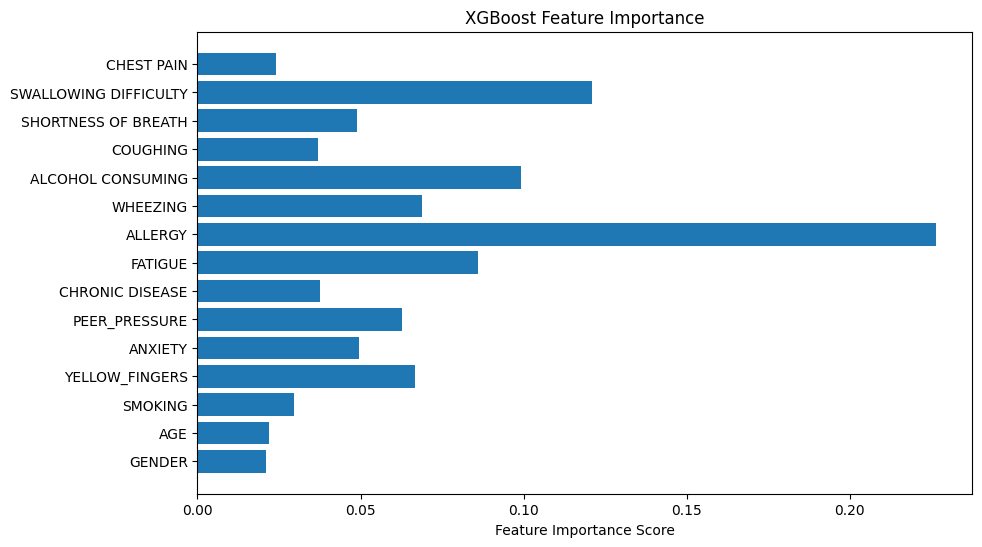

In [51]:
plt.figure(figsize=(10, 6))
plt.barh(X.columns, best_xgboost_model.feature_importances_)
plt.xlabel('Feature Importance Score')
plt.title('XGBoost Feature Importance')
plt.show()

Final Result

In [53]:
algorithms = ['Logistic Regression', 'Support Vector Classifier', 'Random Forest', 'XGBoost Classifier']
accuracies = [log_reg_accuracy, svc_accuracy, rf_accuracy, xgboost_accuracy]

results_df = pd.DataFrame({'Algorithms': algorithms, 'Accuracies': accuracies})


results_df

,Algorithms,Accuracies
0,Logistic Regression,0.895833
1,Support Vector Classifier,0.937500
2,Random Forest,0.968750
3,XGBoost Classifier,0.979167
